<a href="https://colab.research.google.com/github/Strangeabhi/ML-2025/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

Training

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


Normalization

In [9]:
y_train_binary = (y_train % 2 != 0).astype(int)
y_test_binary = (y_test % 2 != 0).astype(int)

Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

# Use Linear Regression
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, y_train_binary)

LinearRegression(n_jobs=-1)

Step 7: Make predictions

In [11]:
# Make predictions using Linear Regression
y_pred = linear_reg.predict(X_test)
# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

Step 8: Evaluate the model

In [12]:
# Evaluate the Linear Regression model
acc = accuracy_score(y_test_binary, y_pred_binary)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")


✅ Test Accuracy: 89.40%


Step 9: Confusion Matrix

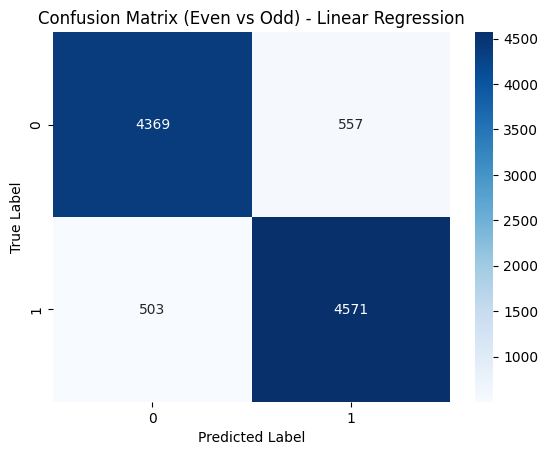

In [13]:
# Confusion Matrix for Linear Regression
cm = confusion_matrix(y_test_binary, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Even vs Odd) - Linear Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Step 10: Classification Report

In [14]:
# Classification Report for Linear Regression
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_binary, target_names=['Even (0)', 'Odd (1)']))


Classification Report:
              precision    recall  f1-score   support

    Even (0)       0.90      0.89      0.89      4926
     Odd (1)       0.89      0.90      0.90      5074

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Step 11: Visualize a few predictions

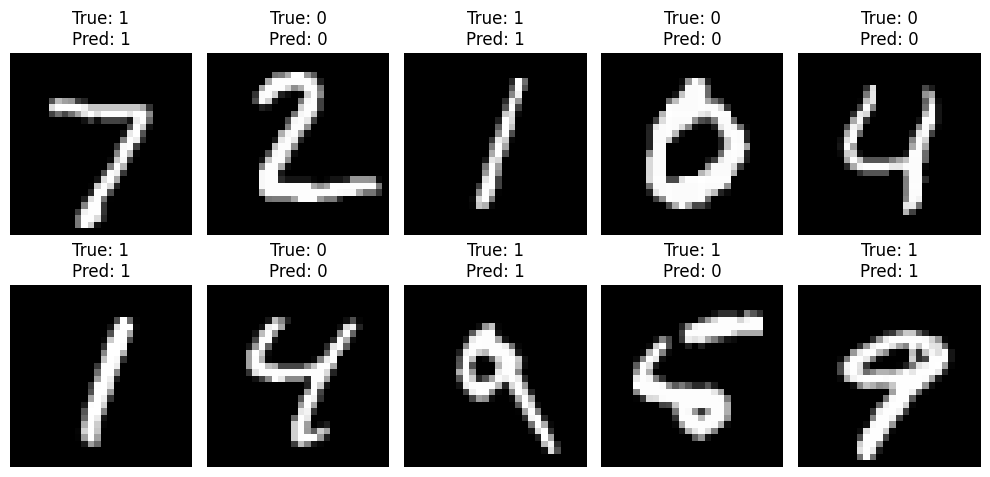

In [15]:
# Visualize a few predictions from Linear Regression
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    # Use the binary predictions for visualization
    ax.set_title(f"True: {y_test_binary[i]}\nPred: {y_pred_binary[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()